In [53]:
import pandas as pd
import numpy as np

In [54]:
demographics = pd.read_csv(r"C:\Users\Shivam Singh Rajput\Desktop\kagle\fraud\Train_Demographics.csv")
demographics.index = demographics["CustomerID"]
demographics.drop("CustomerID", axis =1, inplace = True)
demographics.head()                  

,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country
CustomerID,,,,,,,,,
Cust10000,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India
Cust10001,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,India
Cust10002,33,603260,MALE,JD,armed-forces,polo,66400,-63700,India
Cust10003,36,474848,MALE,JD,armed-forces,polo,47900,-73400,India
Cust10004,29,457942,FEMALE,High School,exec-managerial,dancing,0,-41500,India


In [55]:
cat_cols1 = ["InsuredGender", "InsuredEducationLevel", "InsuredOccupation", "InsuredHobbies", "Country"]
numeric_cols1 = [i for i in demographics if i not in cat_cols1]

In [56]:
numeric_cols1

['InsuredAge', 'InsuredZipCode', 'CapitalGains', 'CapitalLoss']

In [57]:
policy = pd.read_csv(r"C:\Users\Shivam Singh Rajput\Desktop\kagle\fraud\Train_Policy.csv")
policy.index = policy["CustomerID"]
policy.drop("CustomerID", axis =1, inplace = True)
policy.drop("DateOfPolicyCoverage", axis =1, inplace = True)
policy.drop("Policy_CombinedSingleLimit", axis =1, inplace = True)
policy.head()

,InsurancePolicyNumber,CustomerLoyaltyPeriod,InsurancePolicyState,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship
CustomerID,,,,,,,
Cust1001,110122,328,State3,1000,1406.91,0,husband
Cust1004,110125,256,State1,2000,1415.74,6000000,unmarried
Cust1005,110126,228,State1,1000,1583.91,6000000,unmarried
Cust1006,110127,256,State3,1000,1351.10,0,unmarried
Cust1007,110128,137,State2,1000,1333.35,0,husband


In [58]:
cat_cols2 = ["InsurancePolicyState", "InsuredRelationship"]
numeric_cols2 = [i for i in policy if i not in cat_cols2]

In [59]:
numeric_cols2

['InsurancePolicyNumber',
 'CustomerLoyaltyPeriod',
 'Policy_Deductible',
 'PolicyAnnualPremium',
 'UmbrellaLimit']

In [60]:
policy["PolicyAnnualPremium"].value_counts()

-1.00       141
 1310.77      7
 1310.78      6
 1334.47      5
 1285.77      5
 1168.02      5
 1278.14      5
 1315.68      5
 1265.59      5
 1298.80      5
 1226.29      5
 1326.98      5
 1450.33      4
 1129.57      4
 1309.88      4
 1271.31      4
 1221.00      4
 1238.35      4
 1484.15      4
 1193.40      4
 1457.05      4
 1330.09      4
 1099.43      4
 1250.23      4
 1310.79      4
 1304.09      4
 1404.96      4
 1147.22      4
 1315.50      4
 1364.97      4
           ... 
 1358.97      1
 1142.53      1
 1495.26      1
 975.08       1
 1204.25      1
 741.98       1
 1131.31      1
 1161.41      1
 1226.85      1
 1420.36      1
 780.27       1
 1070.99      1
 1477.78      1
 1563.12      1
 1526.23      1
 1273.96      1
 938.80       1
 1325.34      1
 1185.88      1
 1416.43      1
 1643.89      1
 1236.24      1
 1423.85      1
 1062.27      1
 1055.03      1
 1221.15      1
 1335.62      1
 1254.04      1
 1349.91      1
 1397.95      1
Name: PolicyAnnualPremiu

In [61]:
mean = policy["PolicyAnnualPremium"].mean()

In [62]:
policy.replace(-1,mean, inplace = True)

In [63]:
claim = pd.read_csv(r"C:\Users\Shivam Singh Rajput\Desktop\kagle\fraud\Train_Claim.csv")
claim.index = claim["CustomerID"]
claim.drop("CustomerID", axis =1, inplace = True)
claim.drop("DateOfIncident", axis =1, inplace = True)
claim.drop("IncidentAddress", axis =1, inplace = True)
claim

,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
CustomerID,,,,,,,,,,,,,,,,
Cust10000,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,17,3,?,1,0,?,65501,13417,6071,46013
Cust10001,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,10,3,YES,2,1,YES,61382,15560,5919,39903
Cust10002,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,22,1,YES,2,3,NO,66755,11630,11630,43495
Cust10003,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,22,1,YES,2,3,NO,66243,12003,12003,42237
Cust10004,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,10,1,NO,2,1,YES,53544,8829,7234,37481
Cust10005,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State7,City6,7,1,NO,1,2,?,53167,7818,8132,37217
Cust10006,Single Vehicle Collision,Front Collision,Minor Damage,Ambulance,State5,City4,20,1,?,0,2,NO,77453,6476,12822,58155
Cust10007,Single Vehicle Collision,Front Collision,Minor Damage,Police,State5,City3,18,1,?,0,2,NO,60569,5738,7333,47498
Cust10009,Multi-vehicle Collision,Front Collision,Minor Damage,Ambulance,State9,City2,3,3,YES,0,0,?,67876,6788,7504,53584


In [64]:
cat_cols3 = ["TypeOfIncident", "TypeOfCollission", "SeverityOfIncident", "AuthoritiesContacted", "IncidentState", "IncidentCity", "PropertyDamage","PoliceReport"]
numeric_cols3 = [i for i in claim if i not in cat_cols3]

In [65]:
numeric_cols3

['IncidentTime',
 'NumberOfVehicles',
 'BodilyInjuries',
 'Witnesses',
 'AmountOfTotalClaim',
 'AmountOfInjuryClaim',
 'AmountOfPropertyClaim',
 'AmountOfVehicleDamage']

In [66]:
claim["TypeOfCollission"].replace("?","Rear Collision", inplace = True)
claim.drop("PropertyDamage", axis = 1, inplace = True)
claim.drop("PoliceReport", axis = 1, inplace = True)

In [67]:
claim["Witnesses"].value_counts()
claim["Witnesses"].replace("MISSINGVALUE","2", inplace = True)

In [68]:

claim["AmountOfTotalClaim"].replace("MISSEDDATA","6820", inplace = True)


In [69]:
vehicle = pd.read_csv(r"C:\Users\Shivam Singh Rajput\Desktop\kagle\fraud\Train_Vehicle.csv")
vehicle.head()

,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust20179,VehicleID,Vehicle8898
1,Cust21384,VehicleModel,Malibu
2,Cust33335,VehicleMake,Toyota
3,Cust27118,VehicleModel,Neon
4,Cust13038,VehicleID,Vehicle30212


In [70]:
vehicle.VehicleAttribute.value_counts()

VehicleModel    28836
VehicleMake     28836
VehicleYOM      28836
VehicleID       28836
Name: VehicleAttribute, dtype: int64

In [71]:
vehicle = vehicle.pivot(index= "CustomerID", columns = "VehicleAttribute")

In [72]:
vehicle.head()

VehicleAttributeDetails                                    
VehicleAttribute               VehicleID VehicleMake VehicleModel VehicleYOM
CustomerID                                                                  
Cust10000                   Vehicle26917        Audi           A5       2008
Cust10001                   Vehicle15893        Audi           A5       2006
Cust10002                    Vehicle5152  Volkswagen        Jetta       1999
Cust10003                   Vehicle37363  Volkswagen        Jetta       2003
Cust10004                   Vehicle28633      Toyota          CRV       2010

In [73]:
vehicle.columns

MultiIndex(levels=[['VehicleAttributeDetails'], ['VehicleID', 'VehicleMake', 'VehicleModel', 'VehicleYOM']],
           codes=[[0, 0, 0, 0], [0, 1, 2, 3]],
           names=[None, 'VehicleAttribute'])

In [74]:
vehicle["VehicleAttributeDetails"].replace("???","Saab", inplace = True)

In [75]:
vehicle.drop("VehicleID", axis =1, level = 1, inplace = True)
vehicle.head()

VehicleAttributeDetails                        
VehicleAttribute             VehicleMake VehicleModel VehicleYOM
CustomerID                                                      
Cust10000                           Audi           A5       2008
Cust10001                           Audi           A5       2006
Cust10002                     Volkswagen        Jetta       1999
Cust10003                     Volkswagen        Jetta       2003
Cust10004                         Toyota          CRV       2010

In [76]:
vehicle = vehicle.droplevel(level = 0, axis = 1)

In [77]:
vehicle.head()

VehicleAttribute,VehicleMake,VehicleModel,VehicleYOM
CustomerID,,,
Cust10000,Audi,A5,2008
Cust10001,Audi,A5,2006
Cust10002,Volkswagen,Jetta,1999
Cust10003,Volkswagen,Jetta,2003
Cust10004,Toyota,CRV,2010


In [78]:
vehicle.columns

Index(['VehicleMake', 'VehicleModel', 'VehicleYOM'], dtype='object', name='VehicleAttribute')

In [79]:
cat_cols4 = ["VehicleMake", "VehicleModel"]

In [80]:
target = pd.read_csv(r"C:\Users\Shivam Singh Rajput\Desktop\kagle\fraud\Train.csv")
target.index = target["CustomerID"]
target.drop("CustomerID", axis =1, inplace = True)
target.head()

,ReportedFraud
CustomerID,
Cust20065,N
Cust37589,N
Cust24312,N
Cust5493,Y
Cust7704,Y


In [81]:
a = pd.merge(demographics,policy, on ="CustomerID")
b = pd.merge(a,claim, on = "CustomerID")
c = pd.merge(b,vehicle, on = "CustomerID")
fraud_case = pd.merge(c,target, on = "CustomerID")

In [82]:
c.shape

(28836, 33)

In [83]:
fraud_case.head()

,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,InsurancePolicyNumber,...,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,VehicleMake,VehicleModel,VehicleYOM,ReportedFraud
CustomerID,,,,,,,,,,,,,,,,,,,,,
Cust10000,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India,119121,...,1,0,65501,13417,6071,46013,Audi,A5,2008,N
Cust10001,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,India,119122,...,2,1,61382,15560,5919,39903,Audi,A5,2006,N
Cust10002,33,603260,MALE,JD,armed-forces,polo,66400,-63700,India,119123,...,2,3,66755,11630,11630,43495,Volkswagen,Jetta,1999,N
Cust10003,36,474848,MALE,JD,armed-forces,polo,47900,-73400,India,119124,...,2,3,66243,12003,12003,42237,Volkswagen,Jetta,2003,N
Cust10004,29,457942,FEMALE,High School,exec-managerial,dancing,0,-41500,India,119125,...,2,1,53544,8829,7234,37481,Toyota,CRV,2010,N


In [84]:
fraud_case.Country.value_counts()

India    28834
Name: Country, dtype: int64

In [85]:
fraud_case["InsuredGender"].fillna("FEMALE", inplace = True)

In [86]:
fraud_case["Country"].fillna("India", inplace = True)

In [87]:
fraud_case.isnull().sum()

InsuredAge               0
InsuredZipCode           0
InsuredGender            0
InsuredEducationLevel    0
InsuredOccupation        0
InsuredHobbies           0
CapitalGains             0
CapitalLoss              0
Country                  0
InsurancePolicyNumber    0
CustomerLoyaltyPeriod    0
InsurancePolicyState     0
Policy_Deductible        0
PolicyAnnualPremium      0
UmbrellaLimit            0
InsuredRelationship      0
TypeOfIncident           0
TypeOfCollission         0
SeverityOfIncident       0
AuthoritiesContacted     0
IncidentState            0
IncidentCity             0
IncidentTime             0
NumberOfVehicles         0
BodilyInjuries           0
Witnesses                0
AmountOfTotalClaim       0
AmountOfInjuryClaim      0
AmountOfPropertyClaim    0
AmountOfVehicleDamage    0
VehicleMake              0
VehicleModel             0
VehicleYOM               0
ReportedFraud            0
dtype: int64

In [88]:
fraud_case.columns

Index(['InsuredAge', 'InsuredZipCode', 'InsuredGender',
       'InsuredEducationLevel', 'InsuredOccupation', 'InsuredHobbies',
       'CapitalGains', 'CapitalLoss', 'Country', 'InsurancePolicyNumber',
       'CustomerLoyaltyPeriod', 'InsurancePolicyState', 'Policy_Deductible',
       'PolicyAnnualPremium', 'UmbrellaLimit', 'InsuredRelationship',
       'TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident',
       'AuthoritiesContacted', 'IncidentState', 'IncidentCity', 'IncidentTime',
       'NumberOfVehicles', 'BodilyInjuries', 'Witnesses', 'AmountOfTotalClaim',
       'AmountOfInjuryClaim', 'AmountOfPropertyClaim', 'AmountOfVehicleDamage',
       'VehicleMake', 'VehicleModel', 'VehicleYOM', 'ReportedFraud'],
      dtype='object')

In [89]:
cat_cols = ["InsuredGender", "InsuredEducationLevel", "InsuredOccupation", "InsuredHobbies", "Country", "InsurancePolicyState", "InsuredRelationship","TypeOfIncident", "TypeOfCollission", "SeverityOfIncident", "AuthoritiesContacted", "IncidentState", "IncidentCity", "VehicleMake", "VehicleModel"]
numeric_cols = [i for i in c if i not in cat_cols]

In [90]:
numeric_cols

['InsuredAge',
 'InsuredZipCode',
 'CapitalGains',
 'CapitalLoss',
 'InsurancePolicyNumber',
 'CustomerLoyaltyPeriod',
 'Policy_Deductible',
 'PolicyAnnualPremium',
 'UmbrellaLimit',
 'IncidentTime',
 'NumberOfVehicles',
 'BodilyInjuries',
 'Witnesses',
 'AmountOfTotalClaim',
 'AmountOfInjuryClaim',
 'AmountOfPropertyClaim',
 'AmountOfVehicleDamage',
 'VehicleYOM']

In [91]:
c[numeric_cols] = c[numeric_cols].astype(float)
c[cat_cols] = c[cat_cols].astype(object)

In [92]:
c[cat_cols].nunique()

InsuredGender             2
InsuredEducationLevel     7
InsuredOccupation        14
InsuredHobbies           20
Country                   1
InsurancePolicyState      3
InsuredRelationship       6
TypeOfIncident            4
TypeOfCollission          3
SeverityOfIncident        4
AuthoritiesContacted      5
IncidentState             7
IncidentCity              7
VehicleMake              14
VehicleModel             39
dtype: int64

In [93]:
drop_list = []
for i in cat_cols:
    if len(c[i].value_counts())>10:
        print(i)
        print(len(c[i].value_counts()))
        drop_list.append(i)
drop_list

InsuredOccupation
14
InsuredHobbies
20
VehicleMake
14
VehicleModel
39


['InsuredOccupation', 'InsuredHobbies', 'VehicleMake', 'VehicleModel']

In [94]:
c.drop(drop_list, axis = 1, inplace = True)
fraud_case.drop(drop_list, axis = 1, inplace = True)
cat_cols = [i for i in cat_cols if not i in drop_list]

In [95]:
a = 0
for i in cat_cols:
    a += len(c[i].value_counts())
a - 2*11 + c.shape[1]

56

In [96]:
fraud_case_dummies = pd.get_dummies(c,drop_first=True,columns=cat_cols)
fraud_case_dummies.head()

,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,IncidentTime,...,IncidentState_State6,IncidentState_State7,IncidentState_State8,IncidentState_State9,IncidentCity_City2,IncidentCity_City3,IncidentCity_City4,IncidentCity_City5,IncidentCity_City6,IncidentCity_City7
CustomerID,,,,,,,,,,,,,,,,,,,,,
Cust10000,35.0,454776.0,56700.0,-48500.0,119121.0,49.0,1000.0,1632.73,0.0,17.0,...,0,1,0,0,0,0,0,0,0,0
Cust10001,36.0,454776.0,70600.0,-48500.0,119122.0,114.0,1000.0,1255.19,0.0,10.0,...,0,1,0,0,0,0,0,1,0,0
Cust10002,33.0,603260.0,66400.0,-63700.0,119123.0,167.0,617.0,1373.38,0.0,22.0,...,0,0,1,0,0,0,0,0,1,0
Cust10003,36.0,474848.0,47900.0,-73400.0,119124.0,190.0,722.0,1337.60,0.0,22.0,...,0,0,0,1,0,0,0,0,1,0
Cust10004,29.0,457942.0,0.0,-41500.0,119125.0,115.0,500.0,1353.73,4279863.0,10.0,...,0,0,1,0,0,0,0,0,1,0


In [97]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [98]:
scaler = MinMaxScaler(feature_range=(0, 1), copy=True)
fraud_case_scaled = fraud_case_dummies.copy()
fraud_case_scaled[numeric_cols] = scaler.fit_transform(fraud_case_dummies[numeric_cols])
fraud_case_scaled.head()

,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,InsurancePolicyNumber,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,IncidentTime,...,IncidentState_State6,IncidentState_State7,IncidentState_State8,IncidentState_State9,IncidentCity_City2,IncidentCity_City3,IncidentCity_City4,IncidentCity_City5,IncidentCity_City6,IncidentCity_City7
CustomerID,,,,,,,,,,,,,,,,,,,,,
Cust10000,0.355556,0.129269,0.564179,0.563456,0.233758,0.100418,0.333333,0.742532,0.090909,0.785714,...,0,1,0,0,0,0,0,0,0,0
Cust10001,0.377778,0.129269,0.702488,0.563456,0.233784,0.236402,0.333333,0.508226,0.090909,0.535714,...,0,1,0,0,0,0,0,1,0,0
Cust10002,0.311111,0.907250,0.660697,0.426643,0.233810,0.347280,0.078000,0.581576,0.090909,0.964286,...,0,0,1,0,0,0,0,0,1,0
Cust10003,0.377778,0.234436,0.476617,0.339334,0.233836,0.395397,0.148000,0.559371,0.090909,0.964286,...,0,0,0,1,0,0,0,0,1,0
Cust10004,0.222222,0.145857,0.000000,0.626463,0.233862,0.238494,0.000000,0.569381,0.479988,0.535714,...,0,0,1,0,0,0,0,0,1,0


In [99]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [100]:
X = fraud_case_scaled
y = fraud_case["ReportedFraud"]
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [101]:
pca = PCA()
pca_model = pca.fit(X_train)
pca_transf = pca.transform(X_train)
#pca.explained_variance_

In [102]:
pca_transf

array([[-2.20673443e-01, -2.97060319e-01, -7.56609790e-01, ...,
         1.27147395e-02,  1.07896626e-01, -1.47385947e-03],
       [ 1.31352923e+00,  6.80863288e-01,  1.52646993e-01, ...,
        -1.85717195e-02, -7.14296983e-02, -1.31438982e-03],
       [-3.90355289e-01, -7.17493499e-01, -6.05717743e-01, ...,
        -1.41315745e-02,  2.98221413e-02,  1.83032247e-03],
       ...,
       [ 1.37207418e+00, -7.51152642e-01, -5.13726290e-01, ...,
        -4.59001485e-03, -5.43554939e-02,  9.67469931e-04],
       [-4.28986498e-01,  8.90749813e-01,  6.60623520e-01, ...,
         6.52734816e-03, -1.48134335e-02,  2.28711852e-04],
       [ 3.96532896e-01, -7.84451915e-01,  5.33837555e-01, ...,
         3.05527809e-03, -5.34133071e-02, -2.87591717e-03]])

In [104]:
pca.explained_variance_

array([5.71211966e-01, 3.37875548e-01, 3.13274853e-01, 2.99087429e-01,
       2.67853881e-01, 2.60212851e-01, 2.51683072e-01, 2.29101337e-01,
       2.05477611e-01, 1.98554638e-01, 1.86897646e-01, 1.81709526e-01,
       1.68104433e-01, 1.64795740e-01, 1.61861541e-01, 1.58548151e-01,
       1.53529687e-01, 1.51779816e-01, 1.48554580e-01, 1.43507502e-01,
       1.40393911e-01, 1.38412790e-01, 1.32647968e-01, 1.30977657e-01,
       1.29370369e-01, 1.28018713e-01, 1.24779085e-01, 1.17855322e-01,
       1.15094844e-01, 1.10156238e-01, 1.05556373e-01, 9.96675622e-02,
       8.78718757e-02, 8.24978767e-02, 7.41284812e-02, 7.05354714e-02,
       6.87640423e-02, 6.75432791e-02, 6.18659259e-02, 5.81425136e-02,
       4.05486611e-02, 3.32756143e-02, 3.20578161e-02, 3.10210175e-02,
       2.81239661e-02, 2.57586046e-02, 2.13743347e-02, 2.08524982e-02,
       1.82576515e-02, 1.54940696e-02, 1.39231707e-02, 8.14735555e-03,
       5.53323175e-03, 3.23862040e-03, 2.31366376e-03, 2.43206566e-04])

In [105]:
pca.explained_variance_ratio_

array([8.28075580e-02, 4.89812026e-02, 4.54148846e-02, 4.33581597e-02,
       3.88302891e-02, 3.77225829e-02, 3.64860364e-02, 3.32124033e-02,
       2.97877149e-02, 2.87841041e-02, 2.70942112e-02, 2.63420990e-02,
       2.43697934e-02, 2.38901381e-02, 2.34647726e-02, 2.29844366e-02,
       2.22569190e-02, 2.20032434e-02, 2.15356868e-02, 2.08040211e-02,
       2.03526495e-02, 2.00654500e-02, 1.92297342e-02, 1.89875923e-02,
       1.87545866e-02, 1.85586396e-02, 1.80889966e-02, 1.70852712e-02,
       1.66850898e-02, 1.59691491e-02, 1.53023150e-02, 1.44486249e-02,
       1.27386257e-02, 1.19595669e-02, 1.07462708e-02, 1.02253988e-02,
       9.96859793e-03, 9.79162610e-03, 8.96859055e-03, 8.42881426e-03,
       5.87826551e-03, 4.82390518e-03, 4.64736320e-03, 4.49706038e-03,
       4.07708012e-03, 3.73417798e-03, 3.09859836e-03, 3.02294868e-03,
       2.64677847e-03, 2.24614704e-03, 2.01841670e-03, 1.18110729e-03,
       8.02142525e-04, 4.69496899e-04, 3.35407619e-04, 3.52572128e-05])

In [107]:
var_percent = np.round(pca.explained_variance_ratio_*100, decimals = 1, out = None)
var_percent

array([8.3, 4.9, 4.5, 4.3, 3.9, 3.8, 3.6, 3.3, 3. , 2.9, 2.7, 2.6, 2.4,
       2.4, 2.3, 2.3, 2.2, 2.2, 2.2, 2.1, 2. , 2. , 1.9, 1.9, 1.9, 1.9,
       1.8, 1.7, 1.7, 1.6, 1.5, 1.4, 1.3, 1.2, 1.1, 1. , 1. , 1. , 0.9,
       0.8, 0.6, 0.5, 0.5, 0.4, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.2, 0.1,
       0.1, 0. , 0. , 0. ])

In [109]:
import matplotlib.pyplot as plt

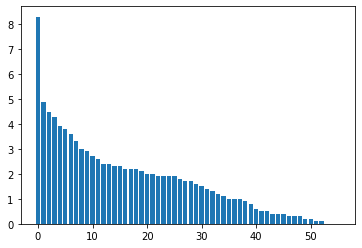

In [110]:
plt.bar(x = range(0, len(var_percent)), height = var_percent)
plt.show()

In [111]:
train_pca = pca.transform(X_train)
X_train_pca = train_pca[:,0:43]

In [112]:
test_pca = pca.transform(X_test)
X_test_pca = test_pca[:,0:43]

In [113]:
from sklearn.linear_model import LogisticRegressionCV

In [114]:
LR_clf_cv = LogisticRegressionCV(Cs=[10,1,0.1,100], random_state= 2)
LR_clf_cv.fit(X_train,y_train)
y_pred = LR_clf_cv.predict(X_test)
y_pred

C:\Users\Shivam Singh Rajput\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Shivam Singh Rajput\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

array(['N', 'N', 'N', ..., 'Y', 'N', 'N'], dtype=object)

In [115]:
y_pred_prob = LR_clf_cv.predict_proba(X_train)

In [117]:
a = y_pred_prob[:,1]
a

array([0.07846635, 0.16221036, 0.19064994, ..., 0.09740117, 0.01940711,
       0.37692788])

In [118]:
from sklearn.metrics import confusion_matrix,classification_report

In [119]:
confusion_matrix(y_pred=y_pred,y_true= y_test)

array([[4806,  375],
       [ 819, 1209]], dtype=int64)

In [120]:
conf_mat = y_test.value_counts()

In [121]:
print(classification_report(y_pred=y_pred,y_true= y_test))

              precision    recall  f1-score   support

           N       0.85      0.93      0.89      5181
           Y       0.76      0.60      0.67      2028

    accuracy                           0.83      7209
   macro avg       0.81      0.76      0.78      7209
weighted avg       0.83      0.83      0.83      7209



In [123]:
LR_clf_cv = LogisticRegressionCV(Cs=[10,1,0.1,100], random_state= 2)
LR_clf_cv.fit(X_train_pca,y_train)
y_pred = LR_clf_cv.predict(X_test_pca)
y_pred

array(['N', 'N', 'N', ..., 'Y', 'N', 'N'], dtype=object)

In [125]:
y_pred_prob = LR_clf_cv.predict_proba(X_train_pca)

In [130]:
a = y_pred_prob[:,1]
a

array([0.09623347, 0.13095956, 0.13257246, ..., 0.15307403, 0.02447343,
       0.44255705])

In [131]:
confusion_matrix(y_pred=y_pred,y_true= y_test)

array([[4813,  368],
       [ 874, 1154]], dtype=int64)

In [132]:
print(classification_report(y_pred=y_pred,y_true= y_test))

              precision    recall  f1-score   support

           N       0.85      0.93      0.89      5181
           Y       0.76      0.57      0.65      2028

    accuracy                           0.83      7209
   macro avg       0.80      0.75      0.77      7209
weighted avg       0.82      0.83      0.82      7209



In [133]:
from sklearn.metrics import roc_auc_score, roc_curve

In [134]:
roc_auc_score(y_train, a, average='macro', sample_weight=None, max_fpr=None)

0.8628311890984144

In [139]:
fpr,tpr,threshold = roc_curve(y_train, a, pos_label= 0, sample_weight=None, drop_intermediate=True)

In [143]:
tpr

array([nan, nan, nan])

In [144]:
fpr

array([0.00000000e+00, 4.62384982e-05, 1.00000000e+00])

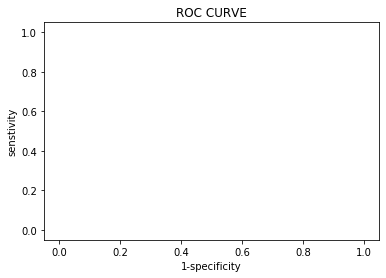

In [141]:
plt.plot(fpr,tpr)
plt.title("ROC CURVE")
plt.xlabel("1-specificity")
plt.ylabel("senstivity")
plt.show()